In [31]:
from IPython.core.debugger import set_trace

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style='seaborn')
%matplotlib inline

C:\Users\97798\AppData\Local\Temp\ipykernel_9136\3932839874.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


In [32]:
df = pd.read_csv('./Data/GBIMEfinal.csv')

In [33]:
df.head()

,Unnamed: 0,t,c,o,h,l,v
0,0,2012-09-09 14:59:59,46.052427,46.052427,46.052427,42.894547,50
1,1,2012-09-10 14:59:59,50.526092,46.052427,50.526092,46.841898,254
2,2,2012-09-11 14:59:59,55.526070,50.526092,55.526070,51.315562,376
3,3,2012-09-12 14:59:59,61.052361,55.526070,61.052361,56.578697,1131
4,4,2012-09-13 14:59:59,67.104966,61.052361,67.104966,62.104988,27430


In [34]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [35]:
df

,t,c,o,h,l,v
0,2012-09-09 14:59:59,46.052427,46.052427,46.052427,42.894547,50
1,2012-09-10 14:59:59,50.526092,46.052427,50.526092,46.841898,254
2,2012-09-11 14:59:59,55.526070,50.526092,55.526070,51.315562,376
3,2012-09-12 14:59:59,61.052361,55.526070,61.052361,56.578697,1131
4,2012-09-13 14:59:59,67.104966,61.052361,67.104966,62.104988,27430
...,...,...,...,...,...,...
1992,2023-05-07 14:59:40,183.000000,187.000000,187.000000,183.000000,49157
1993,2023-05-08 14:59:40,181.500000,186.000000,186.000000,180.200000,70629
1994,2023-05-09 14:59:40,183.200000,184.900000,184.900000,180.400000,59202
1995,2023-05-10 14:59:40,183.200000,185.000000,185.000000,182.200000,30993


In [36]:
df.describe()

,c,o,h,l,v
count,1997.000000,1997.000000,1997.000000,1997.000000,1.997000e+03
mean,216.481309,217.240000,220.023637,213.505358,6.667855e+04
std,72.421479,73.549475,74.352119,71.668290,1.251157e+05
min,46.052427,46.052427,46.052427,42.894547,2.000000e+01
25%,182.549343,182.926511,184.690813,180.547109,9.894000e+03
50%,199.484189,199.749152,201.803773,196.236772,2.300300e+04
75%,230.102693,231.958360,233.814027,227.319193,7.040600e+04
max,441.306267,451.897617,460.723742,434.245366,1.977590e+06


In [37]:
df.set_index(pd.to_datetime(df['t']), inplace=True)
df

,t,c,o,h,l,v
t,,,,,,
2012-09-09 14:59:59,2012-09-09 14:59:59,46.052427,46.052427,46.052427,42.894547,50
2012-09-10 14:59:59,2012-09-10 14:59:59,50.526092,46.052427,50.526092,46.841898,254
2012-09-11 14:59:59,2012-09-11 14:59:59,55.526070,50.526092,55.526070,51.315562,376
2012-09-12 14:59:59,2012-09-12 14:59:59,61.052361,55.526070,61.052361,56.578697,1131
2012-09-13 14:59:59,2012-09-13 14:59:59,67.104966,61.052361,67.104966,62.104988,27430
...,...,...,...,...,...,...
2023-05-07 14:59:40,2023-05-07 14:59:40,183.000000,187.000000,187.000000,183.000000,49157
2023-05-08 14:59:40,2023-05-08 14:59:40,181.500000,186.000000,186.000000,180.200000,70629
2023-05-09 14:59:40,2023-05-09 14:59:40,183.200000,184.900000,184.900000,180.400000,59202


In [38]:
 #df.drop('t',axis=1,inplace=True)

In [39]:
df

,t,c,o,h,l,v
t,,,,,,
2012-09-09 14:59:59,2012-09-09 14:59:59,46.052427,46.052427,46.052427,42.894547,50
2012-09-10 14:59:59,2012-09-10 14:59:59,50.526092,46.052427,50.526092,46.841898,254
2012-09-11 14:59:59,2012-09-11 14:59:59,55.526070,50.526092,55.526070,51.315562,376
2012-09-12 14:59:59,2012-09-12 14:59:59,61.052361,55.526070,61.052361,56.578697,1131
2012-09-13 14:59:59,2012-09-13 14:59:59,67.104966,61.052361,67.104966,62.104988,27430
...,...,...,...,...,...,...
2023-05-07 14:59:40,2023-05-07 14:59:40,183.000000,187.000000,187.000000,183.000000,49157
2023-05-08 14:59:40,2023-05-08 14:59:40,181.500000,186.000000,186.000000,180.200000,70629
2023-05-09 14:59:40,2023-05-09 14:59:40,183.200000,184.900000,184.900000,180.400000,59202


In [40]:
df = df[['c']].copy()

In [41]:
df.describe

<bound method NDFrame.describe of                               c
t                              
2012-09-09 14:59:59   46.052427
2012-09-10 14:59:59   50.526092
2012-09-11 14:59:59   55.526070
2012-09-12 14:59:59   61.052361
2012-09-13 14:59:59   67.104966
...                         ...
2023-05-07 14:59:40  183.000000
2023-05-08 14:59:40  181.500000
2023-05-09 14:59:40  183.200000
2023-05-10 14:59:40  183.200000
2023-05-11 14:59:40  182.300000

[1997 rows x 1 columns]>

In [43]:
#check if price series is stationary

from statsmodels.tsa.stattools import adfuller

result = adfuller(df.c.dropna())
print(f"ADF Statistics: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistics: -2.291983140502449
p-value: 0.17456660617484832


In [44]:
from statsmodels.graphics.tsaplots import plot_acf

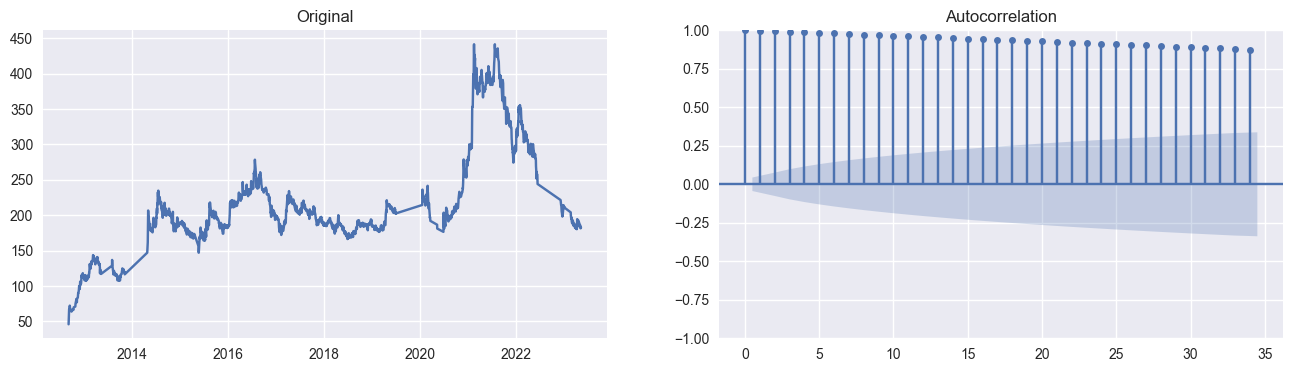

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(df.c)
ax1.set_title('Original')
#add ; at the end of the plot functions so thatr plot is not duplicated
plot_acf(df.c,ax=ax2);

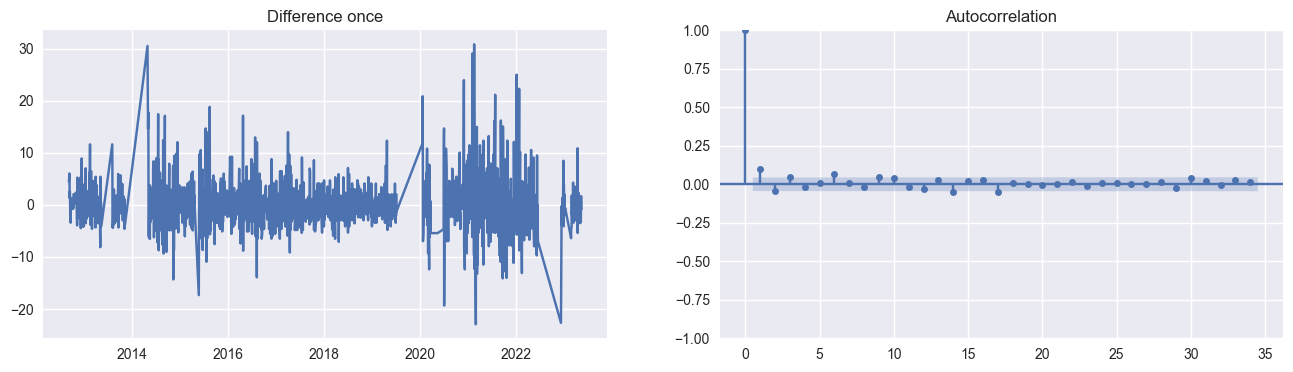

In [47]:
diff = df.c.diff().dropna()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff,ax=ax2);


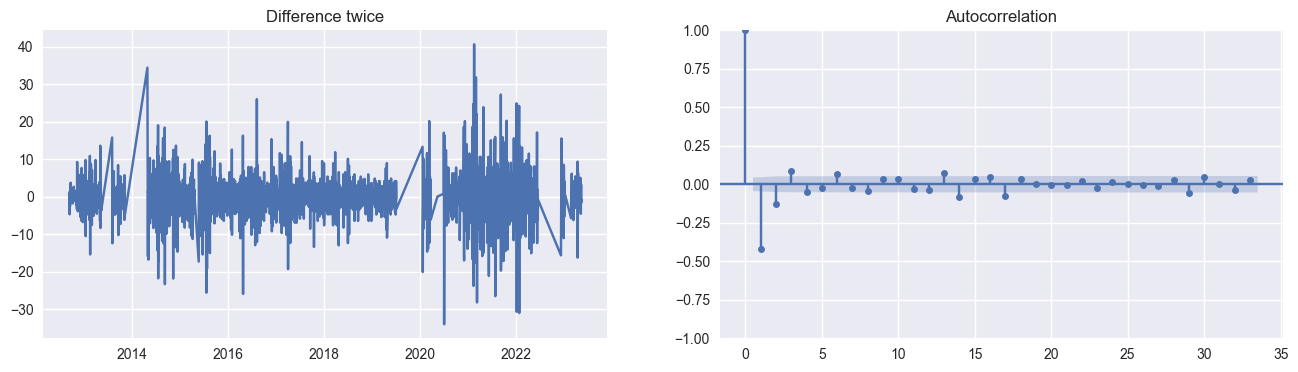

In [48]:
diff = df.c.diff().diff().dropna()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff,ax=ax2);


In [51]:
from pmdarima.arima.utils import ndiffs

In [52]:
ndiffs(df.c,test='adf')

1

In [53]:
from statsmodels.graphics.tsaplots import plot_pacf

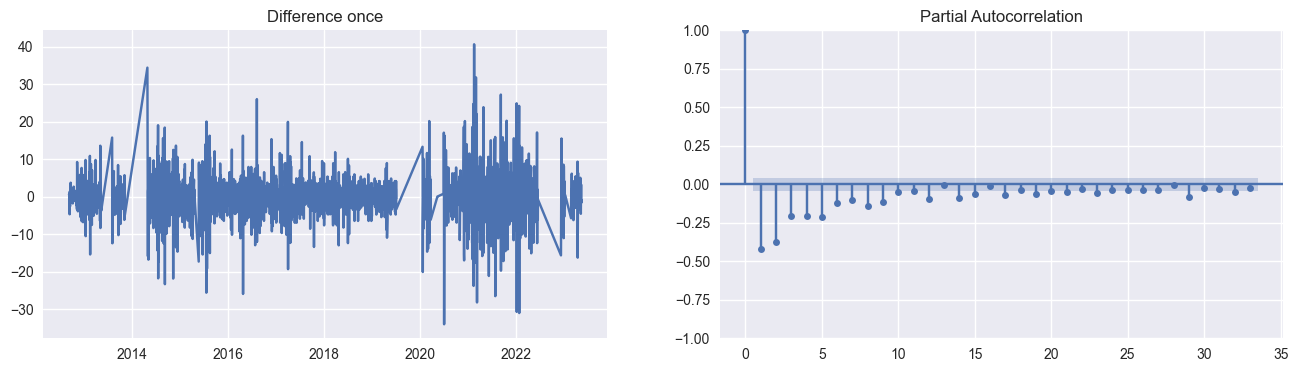

In [54]:
diff = df.c.diff().diff().dropna()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

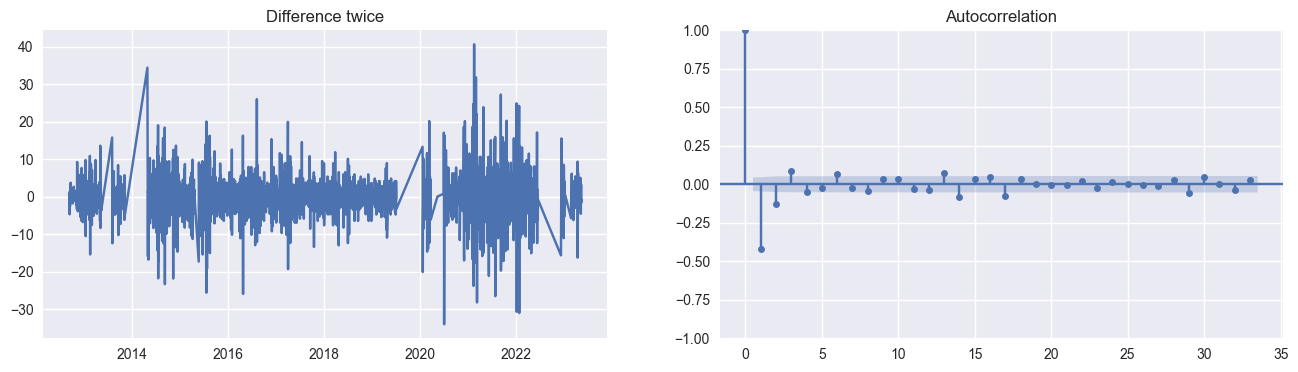

In [55]:
diff = df.c.diff().diff().dropna()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

In [61]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df.c, order=(6,1,3))
result = model.fit()

c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [63]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      c   No. Observations:                 1997
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -5799.500
Date:                Thu, 08 Jun 2023   AIC                          11619.001
Time:                        23:26:23   BIC                          11674.990
Sample:                             0   HQIC                         11639.561
                               - 1997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3274      0.178      1.839      0.066      -0.021       0.676
ar.L2         -0.4376      0.122     -3.582      0.000      -0.677      -0.198
ar.L3          0.6579      0.155      4.232      0.0

(array([2.91559365e-04, 2.33247492e-03, 3.52057934e-02, 9.35905563e-02,
        1.12979254e-02, 2.11380540e-03, 4.37339048e-04, 2.18669524e-04,
        0.00000000e+00, 7.28898413e-05]),
 array([-22.64728679, -15.77731538,  -8.90734396,  -2.03737254,
          4.83259888,  11.7025703 ,  18.57254172,  25.44251314,
         32.31248456,  39.18245597,  46.05242739]),
 <BarContainer object of 10 artists>)

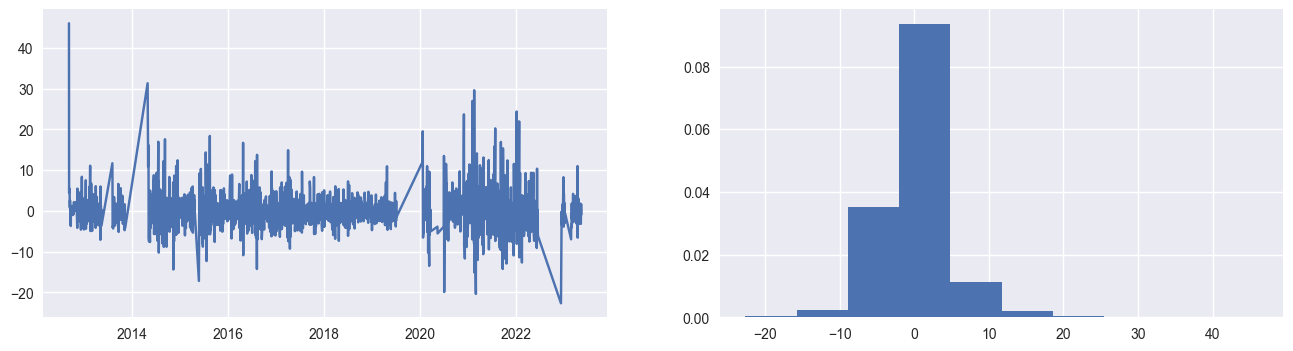

In [64]:
#plot residual error
residuals = pd.DataFrame(result.resid)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, density= True)

In [70]:
from statsmodels.graphics.tsaplots import plot_predict 

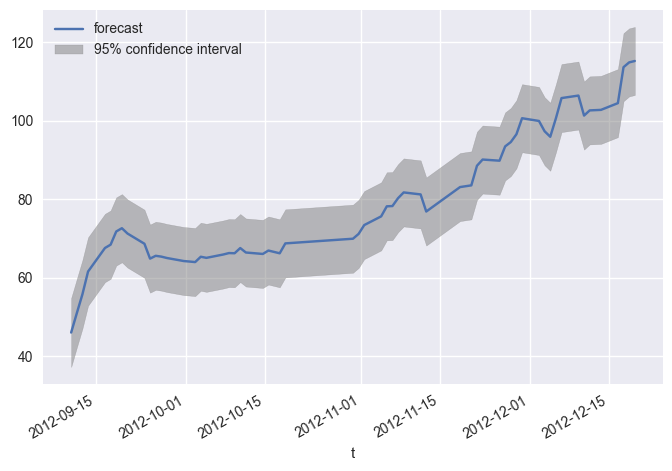

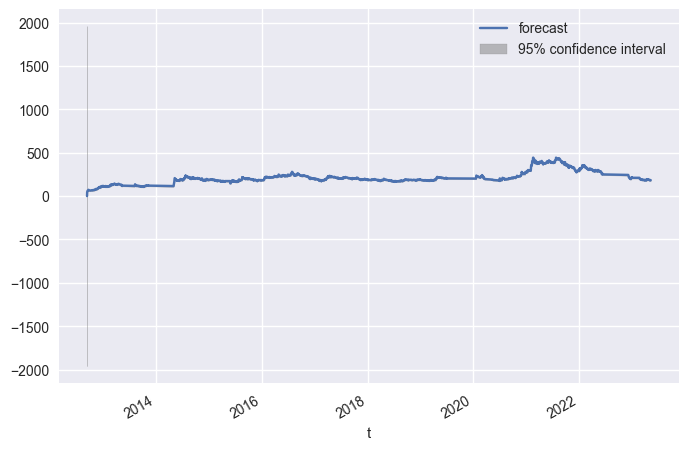

In [75]:
#actual vs fitted
# result.plot_predict(
#     start=1,
#     end=60,
#     dynamic= False,
# )
plot_predict(result,start=1,end=60,dynamic=False)
plt.show()

plot_predict(result,dynamic=False)
plt.show()

In [78]:
n = int(len(df)*0.8)
train = df.c[:n]
test = df.c[n:]

In [79]:
print(len(train))
print(len(test))

1597
400


In [82]:
from statsmodels.tsa.arima.model import ARIMA

In [89]:
model = ARIMA(train, order=(6,1,3))
result = model.fit()

c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [90]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      c   No. Observations:                 1597
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -4389.214
Date:                Thu, 08 Jun 2023   AIC                           8798.428
Time:                        23:40:47   BIC                           8852.180
Sample:                             0   HQIC                          8818.390
                               - 1597                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9339     20.494     -0.046      0.964     -41.102      39.234
ar.L2         -0.6269     11.545     -0.054      0.957     -23.254      22.000
ar.L3         -0.1167      8.693     -0.013      0.989     -17.155      16.922
ar.L4         -0.0192      0.642     -0.030      0.976      -1.278       1.239
ar.L5         -0.0622      0.622     -0.100      0.920      -1.281       1.157
ar.L6         -0.0200      1.037     -0.019      0.985      -2.052       2.012
ma.L1          0.9951     20.495      0.049      0.961     -39.175      41.165
ma.L2          0.6474     12.799      0.051      0.960     -24.439      25.733
ma.L3          0.1469      8.650      0.017      0.986     -16.807      17.101
sigma2        14.3300      0.239     59.909      0.000      13.861      14.799
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3622.90
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
step = 30
fc = result.forecast(step)
conf = result.get_forecast(step).conf_int() 


c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [124]:
conf

,lower c,upper c
1597,301.075304,315.914200
1598,296.862229,318.498583
1599,294.608913,321.052547
1600,292.719097,323.415768
1601,290.053751,324.297852
1602,288.945002,326.110060
1603,287.712391,327.790135
1604,286.032441,328.824065
1605,284.919960,330.176064
1606,283.826146,331.486946


In [130]:
# fc = pd.Series(fc, index= test[:step].index)
# lower = pd.Series(conf[:,0],index=test[:step].index)
# upper = pd.Series(conf[:,1],index=test[:step].index)

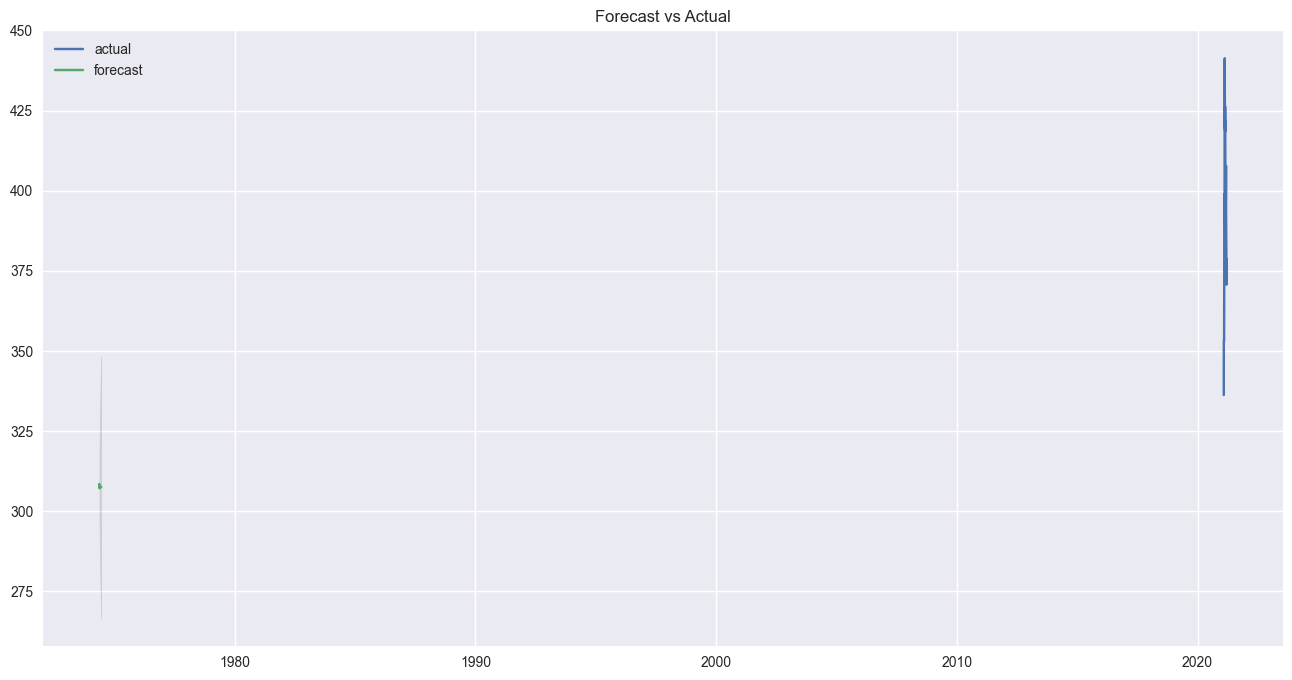

In [131]:
plt.figure(figsize=(16,8))
plt.plot(test[:step],label='actual')
plt.plot(fc,label='forecast')
plt.fill_between(conf.index,conf['lower c'],conf['upper c'], color='k',alpha=0.1)
plt.title('Forecast vs Actual')
plt.legend(loc='upper left')